In [ ]:
# These codes are developed by Panchajanya Dey, Indian Institute of Science, Bangalore
# as a part of the SRFP project prominence oscillation in solar corona funded by Indian Academy of Science (2023)
# this folder contains the codes are for downloading the necessary fits files, modifying them by multi-gaussian image processing
# and creating an animation that helps to identify the location of the prominence oscillation
# the next part is to determine the pixel coordinates and creating a 4-pixel wide slit and get the corresponding XT map
# which is also covered in this project
# finally handpicking the prominence oscillation from the XT map and fitting it to a damped harmonic oscillation is done
# the final result is the period, damping time and amplitude determination for a LAL prominence oscillation
# I thank Prof. Vaibhav Pant (ARIES) and his group member Upasna Baweja (ARIES) for helping me throughout the project
# and clearing my doubts
# for comments, suggestions and clarity regarding the code contact at the following email address
# panchajanyad@iisc.ac.in

In [1]:
# this part of the code is unnecessary as the conversion from fits level1 to level1.5 is done by my project
# guide Upasna Baweja by using aiaprep.pro in IDL
# this was a model python version that didn't work correctly
import astropy
import astropy.units as u
from astropy.io import fits
from astropy.io.fits import CompImageHDU

from sunpy.net import Fido, attrs as a
import sunpy.map

import aiapy.psf as psf_
from aiapy.calibrate import register, update_pointing

import os

In [2]:
folder_path = r"C:\Users\deych\Desktop\Desktop Old\Summer Projects\SRFP\Python and Jupyter\FITS Files"
file_names = os.listdir(folder_path)
file_names[0:5]

['aia.lev1.171A_2016-01-25T00_00_10.34Z.image_lev1.fits',
 'aia.lev1.171A_2016-01-25T00_00_22.34Z.image_lev1.fits',
 'aia.lev1.171A_2016-01-25T00_00_34.34Z.image_lev1.fits',
 'aia.lev1.171A_2016-01-25T00_00_46.34Z.image_lev1.fits',
 'aia.lev1.171A_2016-01-25T00_00_58.34Z.image_lev1.fits']

In [3]:
file_names[0][:48]+'.5'+file_names[0][48:]

'aia.lev1.171A_2016-01-25T00_00_10.34Z.image_lev1.5.fits'

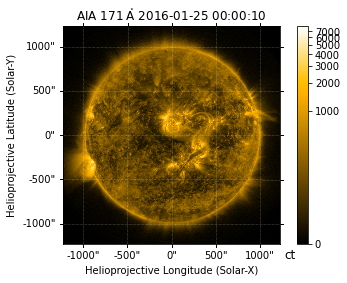

In [4]:
target_file = folder_path+"\\"+file_names[0]
m = sunpy.map.Map(target_file)
m.peek(vmin=0)

In [5]:
m_updated_pointing = update_pointing(m)
m_registered = register(m_updated_pointing)
m_normalized = sunpy.map.Map(
    m_registered.data/m_registered.exposure_time.to(u.s).value,
    m_registered.meta)

In [6]:
#psf = psf_.psf(m_normalized.wavelength)
#map_deconvolved = psf_.deconvolve(m_normalized, psf=psf)

In [7]:
destination_folder = r"C:\Users\deych\Desktop\Desktop Old\Summer Projects\SRFP\Python and Jupyter\FITS 1.5 Files"
upgraded_file = destination_folder+"\\"+file_names[0][:48]+'.5'+file_names[0][48:]
m_normalized.save(upgraded_file,overwrite=True)
print(os.path.getsize(upgraded_file))

# This time pass SunPy the `CompImagHDU <https://docs.astropy.org/en/stable/io/fits/api/images.html#compimagehdu>`_ compression routine from Astropy.
sunpy.io._fits.write(upgraded_file, m_normalized.data,m_normalized.fits_header,hdu_type=CompImageHDU,overwrite=True)
print(os.path.getsize(upgraded_file))

134104320
14385600


In [8]:
#for comparision of level 1 and 1.5 file
hdul0 = fits.open(target_file)  # open initial FITS file
hdr0 = hdul0[0].header  # the primary HDU header of initial FITS file
hdul1 = fits.open(upgraded_file)  # open final FITS file
hdr1 = hdul1[0].header  # the primary HDU header of final FITS file

In [9]:
hdr0

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

In [10]:
hdr1

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [16]:
hdul0[1].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 4096 / length of original image axis                  
NAXIS2  =                 4096 / length of original image axis                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
BLD_VERS= 'V8R10X'                                                              
LVL_NUM = 1.000000                                                              
T_REC   = '2016-01-25T00:00:11Z'                                                
TRECSTEP= 1.000000                                                              
TRECEPOC= '1977.01.01_00:00:

In [17]:
hdul1[1].header

SIMPLE  =                    T                                                  
BITPIX  =                  -64                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 4094                                                  
NAXIS2  =                 4094                                                  
PCOUNT  =                    0                                                  
GCOUNT  =                    1                                                  
XTENSION= 'BINTABLE'           / binary table extension                         
BLD_VERS= 'V8R10X  '                                                            
LVL_NUM =                  1.5                                                  
T_REC   = '2016-01-25T00:00:11Z'                                                
TRECSTEP=                  1.0                                                  
TRECEPOC= '1977.01.01_00:00: